In [1]:
from contextlib import contextmanager

import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw import flow
from schemdraw.util import Point
schemdraw.use('svg')
#schemdraw.settextmode('text')

In [2]:
# Fill parameter. fill(True) picks up element color
with schemdraw.Drawing():
    elm.Diode()   # No fill
    elm.Diode().fill(True)  # Black fill
    elm.Diode().color('blue').fill(True)   # Blue fill
    elm.Diode().color('red').fill('yellow')   # Yellow fill

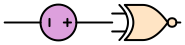

In [3]:
# Fill on paths (like the gate) and shapes (like the source)
with schemdraw.Drawing():
    elm.SourceV().right().fill('plum')
    logic.Xnor().fill('bisque')

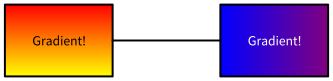

In [4]:
# Gradient fill (SVG backend only)
with schemdraw.Drawing():
    flow.Box().gradient_fill('red', 'yellow').label('Gradient!')
    flow.Line()
    flow.Box().gradient_fill('blue', 'purple', False).label('Gradient!', color='white')

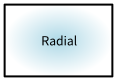

In [5]:
# Arbitrary gradient fill (SVG backend only)
with schemdraw.Drawing() as d:
    d.add_svgdef('''
        <radialGradient id="mygrad" cx="50%" cy="50%" r="50%" fx="50%" fy="50%">
      <stop offset="0%" stop-color="lightblue" />
      <stop offset="100%" stop-color="white" />
    </radialGradient>''')
    flow.Box().fill('url(#mygrad)').label('Radial')

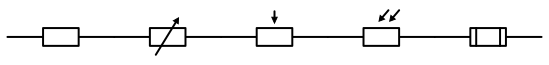

In [6]:
# IEEE vs IEC style
elm.style(elm.STYLE_IEC)
with schemdraw.Drawing():
    elm.Resistor()
    elm.ResistorVar()
    elm.Potentiometer()
    elm.Photoresistor()
    elm.Fuse()

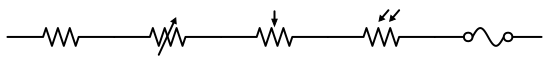

In [7]:
elm.style(elm.STYLE_IEEE)
with schemdraw.Drawing():
    elm.Resistor()
    elm.ResistorVar()
    elm.Potentiometer()
    elm.Photoresistor()
    elm.Fuse()

In [8]:
# Use of Element.defaults
elm.Diode.defaults['fill'] = 'red'
elm.Diode()

In [9]:
# All Subclasses of Diode pick up the default too
elm.DiodeTunnel()

In [10]:
elm.Inductor2()

In [11]:
elm.Inductor2.defaults['loops'] = 2
elm.Inductor2()

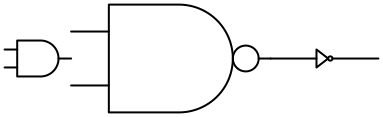

In [12]:
# Scale/zoom
with schemdraw.Drawing():
    logic.And()
    logic.Nand().scale(3)
    logic.Not().scale(.5)

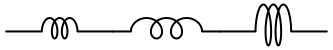

In [13]:
with schemdraw.Drawing():
    elm.Inductor2()
    elm.Inductor2().scalex(2)
    elm.Inductor2().scaley(2)

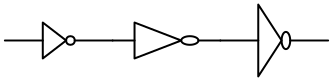

In [14]:
with schemdraw.Drawing():
    logic.Not()
    logic.Not().scalex(2)
    logic.Not().scaley(2)

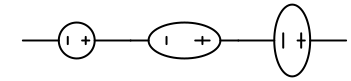

In [15]:
with schemdraw.Drawing():
    elm.SourceV().right()
    elm.SourceV().scalex(2).right()
    elm.SourceV().scaley(2).right()

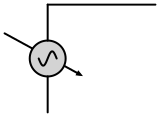

In [16]:
# Zorder. Arrow goes behind.
class TestZorder(elm.SourceSin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.segments.append(schemdraw.Segment([[1.2, 1.2], [0, -1]], arrow='>',
                                          arrowwidth=.12, arrowlength=.2, zorder=0))

with schemdraw.Drawing():
    TestZorder().fill('lightgray')
    elm.Line().right()

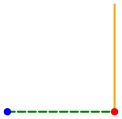

In [17]:
# Nested ElementDrawing. Three different colors
with schemdraw.Drawing(show=False) as d1:
    elm.Dot().color('red') # This color overrides orange color set on ElementDrawing
    elm.Line().up()  # This line picks up color from ElementDrawing (orange)

with schemdraw.Drawing() as d2:
    elm.Dot().color('blue')
    elm.Line().color('green').linestyle('--')
    elm.ElementDrawing(d1).color('orange')

In [18]:
# Themes
def drawtheme(theme):
    schemdraw.theme(theme)
    d = schemdraw.Drawing()
    d += elm.Fuse()  # Use Fuse since it shows open dots that should fill with bg color
    return d
    
drawtheme('default')

In [19]:
drawtheme('dark')

In [20]:
drawtheme('solarizedd')

In [21]:
drawtheme('solarizedl')

In [22]:
drawtheme('monokai')

In [23]:
drawtheme('onedork')

In [24]:
drawtheme('oceans16')

In [25]:
drawtheme('gruvboxl')

In [26]:
drawtheme('gruvboxd')

In [27]:
drawtheme('chesterish')

In [28]:
drawtheme('grade3')

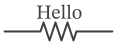

In [29]:
# Setting drawing defaults, can be overridden by elements
d = schemdraw.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw()

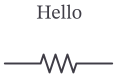

In [30]:
d = schemdraw.Drawing(font='serif', fontsize=20, lblofst=1)
d += elm.Resistor().label('Hello')
d.draw()

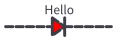

In [31]:
d = schemdraw.Drawing(ls='--', lw=3, fill='red')
d += elm.Diode().label('Hello')
d.draw()

In [32]:
elm.Resistor().linestyle('--')

In [33]:
elm.Resistor().linewidth(3)

In [34]:
elm.Resistor(capstyle='butt')

In [35]:
elm.Resistor().color('blue')

In [36]:
elm.Diode().fill('orange')

In [37]:
elm.Diode().style(color='red', fill='yellow', ls=':', lw=3)

In [38]:
elm.Diode().color('blue').fill(True)  # fill=True picks up element color (poly segment)

In [39]:
d = schemdraw.Drawing(fill='red')
d += elm.Diode().color('blue').fill(False)  # fill=False leaves open even with drawing fill set
d

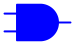

In [40]:
logic.And().color('blue').fill(True)  # fill=True picks up element color (poly segment)

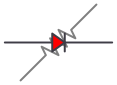

In [41]:
# Resistor should go behind
with schemdraw.Drawing():
    D = elm.Diode().zorder(3)
    elm.Resistor(d=45).at(D.center).anchor('center').color('gray')

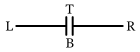

In [42]:
(elm.Capacitor()
     .label('L', font='serif', loc='lft')
     .label('R', font='serif', loc='rgt')
     .label('T', font='serif', loc='top')
     .label('B', font='serif', loc='bot'))

In [43]:
@contextmanager
def shouldraise():
    try:
        yield
    except ValueError:
        pass
    else:
        raise ValueError('It should have raised')

In [44]:
# Color validation - these should all pass in SVG mode
schemdraw.use('svg')
schemdraw.style.validate_color('purple')
schemdraw.style.validate_color('#FFF')
schemdraw.style.validate_color('#FF0033')
schemdraw.style.validate_color('#FF003355')
schemdraw.style.validate_color('rgb(23, 55, 33 )')
schemdraw.style.validate_color('rgb(100% , 50% , 20%)')
schemdraw.style.validate_color('rgb(00, 55.34, 33.2 )')
schemdraw.style.validate_color('rgba(23, 55, 33, .5 )')
schemdraw.style.validate_color('hsl(250, 50% ,20%)')
schemdraw.style.validate_color('hsla(120, 55%, 33%, .5 )')

# These should raise
with shouldraise():
    schemdraw.style.validate_color('#F0')
with shouldraise():
    schemdraw.style.validate_color('FFF')
with shouldraise():
    schemdraw.style.validate_color('#0000')
with shouldraise():
    schemdraw.style.validate_color('hsl(1, 1, 1)')  # Needs to be %
with shouldraise():
    schemdraw.style.validate_color('octarine')

In [45]:
# REMAINING TESTS SHOULD RAISE WARNINGS
elm.Resistor().up().down()

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:824: UserWarning: Duplicated direction parameter in element. `up` changed to `down`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `down`.")


In [46]:
elm.Resistor().down().up()

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:815: UserWarning: Duplicated direction parameter in element. `down` changed to `up`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `up`.")


In [47]:
elm.Resistor().up().left()

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:833: UserWarning: Duplicated direction parameter in element. `up` changed to `left`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `left`.")


In [48]:
elm.Resistor().up().right()

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:842: UserWarning: Duplicated direction parameter in element. `up` changed to `right`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `right`.")


In [49]:
elm.Resistor().up().theta(45)

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:156: UserWarning: Duplicate direciton parameter in element: `up` replaced with `theta=45`
  warnings.warn("Duplicate direciton parameter in element:"


In [50]:
elm.Resistor().at((1,1)).at((2,2))

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:175: UserWarning: Duplicate `at` parameter in element: `Point(1,1)` changed to `(2, 2)`.
  warnings.warn("Duplicate `at` parameter in element: "


In [51]:
elm.Resistor().anchor('center').anchor('center')

/home/collin/Documents/Code/schemdraw/schemdraw/elements/elements.py:221: UserWarning: Duplicate anchor parameter in element: `center` changed to `center`.
  warnings.warn("Duplicate anchor parameter in element: "
